In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [6]:
url1 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/ADBCovid19-export-2020-07-04.csv'

In [7]:
df1 = pd.read_csv(url1)

In [8]:
df1

,Region,Country,Measure Code,Measure,Currency Code,Amount (Local),Amount USD,Source,Post Date,Details
0,Central and West Asia,Afghanistan,01,01 - Liquidity Support,AFN,NaN,NaN,NaN,2020-06-29,NaN
1,Central and West Asia,Afghanistan,01A,01A - Short-term lending,AFN,NaN,NaN,NaN,2020-06-29,NaN
2,Central and West Asia,Afghanistan,01B,01B - Support policies for short-term lending,AFN,NaN,NaN,IMF. https://www.imf.org/en/Topics/imf-and-cov...,2020-06-29,No estimate/amount: The Financial Stability Co...
3,Central and West Asia,Afghanistan,01C,01C - Forex operations,AFN,NaN,NaN,IMF. https://www.imf.org/en/Topics/imf-and-cov...,2020-06-29,No amount/estimate: (i) DAB is in discussions ...
4,Central and West Asia,Afghanistan,02,02 - Credit creation,AFN,NaN,NaN,NaN,2020-06-29,NaN
...,...,...,...,...,...,...,...,...,...,...
2365,Southeast Asia,Viet Nam,09A,09A - Swaps,VND,NaN,NaN,NaN,2020-06-29,NaN
2366,Southeast Asia,Viet Nam,09B,09B - International loans/grants,VND,NaN,NaN,NaN,2020-06-29,NaN
2367,Southeast Asia,Viet Nam,10,10 - No breakdown,VND,NaN,NaN,NaN,2020-06-29,NaN
2368,Southeast Asia,Viet Nam,11,11 - Other Economic Measures,VND,NaN,NaN,"IMF,MOF, SBV. https://www.imf.org/en/Topics/im...",2020-06-29,"(i) On March 31, the State Bank of Vietnam ins..."


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          2370 non-null   object 
 1   Country         2370 non-null   object 
 2   Measure Code    2370 non-null   object 
 3   Measure         2370 non-null   object 
 4   Currency Code   2370 non-null   object 
 5   Amount (Local)  778 non-null    float64
 6   Amount USD      778 non-null    float64
 7   Source          853 non-null    object 
 8   Post Date       2370 non-null   object 
 9   Details         852 non-null    object 
dtypes: float64(2), object(8)
memory usage: 185.3+ KB


In [10]:
df1.drop(columns=['Source', 'Post Date', 'Details'], inplace=True)

In [11]:
df1

,Region,Country,Measure Code,Measure,Currency Code,Amount (Local),Amount USD
0,Central and West Asia,Afghanistan,01,01 - Liquidity Support,AFN,NaN,NaN
1,Central and West Asia,Afghanistan,01A,01A - Short-term lending,AFN,NaN,NaN
2,Central and West Asia,Afghanistan,01B,01B - Support policies for short-term lending,AFN,NaN,NaN
3,Central and West Asia,Afghanistan,01C,01C - Forex operations,AFN,NaN,NaN
4,Central and West Asia,Afghanistan,02,02 - Credit creation,AFN,NaN,NaN
...,...,...,...,...,...,...,...
2365,Southeast Asia,Viet Nam,09A,09A - Swaps,VND,NaN,NaN
2366,Southeast Asia,Viet Nam,09B,09B - International loans/grants,VND,NaN,NaN
2367,Southeast Asia,Viet Nam,10,10 - No breakdown,VND,NaN,NaN
2368,Southeast Asia,Viet Nam,11,11 - Other Economic Measures,VND,NaN,NaN


In [12]:
df1.columns

Index(['Region', 'Country', 'Measure Code', 'Measure', 'Currency Code',
       'Amount (Local)', 'Amount USD'],
      dtype='object')

In [13]:
df1.columns = ['region', 'country', 'measure_id', 'measure_name', 'currency', 'amount_lcy', 'amount_usd']

In [14]:
df1.set_index(['region', 'country'], inplace=True)

In [15]:
z1 = df1.measure_id.unique()
z2 = [1, 1.1, 1.2, 1.3, 2, 2.1, 2.2, 2.3, 3, 3.1, 3.2, 4, 5, 5.1, 5.2,
                            6, 7, 7.1, 7.2, 8, 8.1, 8.2, 8.21, 8.22, 9, 9.1, 9.2, 10, 11, 12]
z2 = [float(i) for i in z2]
z = zip(z1, z2)
df1.measure_id.replace(dict(z), inplace=True)

In [16]:
total_pkg_lcy = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_lcy']
total_pkg_usd = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_usd']
frames = [total_pkg_lcy, total_pkg_usd]
df2 = pd.concat(frames, axis=1)

In [17]:
df2

,amount_lcy,amount_usd
country,,
Afghanistan,8.000000e+09,1.016625e+08
Arab Republic of Egypt,3.334800e+11,2.122053e+10
Argentina,6.787610e+11,1.081691e+10
Armenia,3.000000e+11,6.134861e+08
Australia,4.189555e+11,2.605065e+11
...,...,...
United Kingdom,6.118098e+11,7.574831e+11
United States,6.851653e+12,6.851653e+12
Uzbekistan,3.070000e+11,3.213240e+07


In [18]:
df2.set_index(df1.index.unique(), inplace=True)

In [19]:
df2.sort_index(level=0, inplace=True)

In [20]:
url2 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/IMF-WEO_2019-GDP-2018-Popn.csv'

In [21]:
df3 = pd.read_csv(url2)

In [22]:
df3.set_index('country', inplace=True)

In [23]:
df3.columns = ['gdp_lcy', 'gdp_usd', 'popn']

In [24]:
df3

,gdp_lcy,gdp_usd,popn
country,,,
Afghanistan,1.502470e+12,1.873400e+10,37172386.0
Albania,1.705380e+12,1.541800e+10,2866376.0
Algeria,2.044740e+13,1.727810e+11,42228429.0
Angola,3.147410e+13,9.152700e+10,30809762.0
Argentina,2.160310e+13,4.454690e+11,44494502.0
...,...,...,...
"Virgin Islands, British",NaN,NaN,NaN
"Virgin Islands, U.S.",NaN,NaN,NaN
Wallis and Futuna,NaN,NaN,NaN


In [25]:
df2 = df2.join(df3, on='country')

In [26]:
df2 = df2.assign(pkg_gdp = lambda x: 100 * x.amount_usd / x.gdp_usd)
df2 = df2.assign(pkg_pc_usd = lambda x: x.amount_usd / x.popn)

In [27]:
measures = [1, 2, 3, 4, 5, 9, 10]

m1 = df1[df1.measure_id.isin([measures[0]])].groupby(level=1).sum().loc[:, 'amount_usd']
m2 = df1[df1.measure_id.isin([measures[1]])].groupby(level=1).sum().loc[:, 'amount_usd']
m3 = df1[df1.measure_id.isin([measures[2]])].groupby(level=1).sum().loc[:, 'amount_usd']
m4 = df1[df1.measure_id.isin([measures[3]])].groupby(level=1).sum().loc[:, 'amount_usd']
m5 = df1[df1.measure_id.isin([measures[4]])].groupby(level=1).sum().loc[:, 'amount_usd']
m9 = df1[df1.measure_id.isin([measures[5]])].groupby(level=1).sum().loc[:, 'amount_usd']
m10 = df1[df1.measure_id.isin([measures[6]])].groupby(level=1).sum().loc[:, 'amount_usd']


In [28]:
pd.concat([m1, m2, m3, m4, m5, m9, m10], axis=1)

,amount_usd,amount_usd,amount_usd,amount_usd,amount_usd,amount_usd,amount_usd
country,,,,,,,
Afghanistan,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.016625e+08,0.000000e+00,0.000000e+00
Arab Republic of Egypt,0.000000e+00,6.745160e+09,6.363358e+09,1.272672e+09,6.839337e+09,0.000000e+00,0.000000e+00
Argentina,5.466135e+09,4.940239e+08,5.596813e+08,0.000000e+00,2.166072e+09,0.000000e+00,2.130996e+09
Armenia,0.000000e+00,5.112384e+07,0.000000e+00,0.000000e+00,6.134861e+07,0.000000e+00,5.010136e+08
Australia,0.000000e+00,9.016100e+10,0.000000e+00,0.000000e+00,1.701714e+11,1.741040e+08,0.000000e+00
...,...,...,...,...,...,...,...
United Kingdom,2.955079e+10,1.238102e+11,3.095256e+08,0.000000e+00,1.941245e+11,1.857153e+08,4.095023e+11
United States,4.401370e+11,3.169695e+12,6.050000e+11,0.000000e+00,1.696042e+12,9.407794e+11,0.000000e+00
Uzbekistan,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.213240e+07,0.000000e+00,0.000000e+00


In [29]:
df3 = pd.concat([m1, m2, m3, m4, m5, m9, m10], axis=1)

In [30]:
df3.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm9', 'm10']

In [31]:
df3 = df2.reset_index(level=0).join(df3)

In [32]:
df3 = df3.assign(m1_pkg = lambda x: 100 * x.m1 / x.amount_usd)
df3 = df3.assign(m2_pkg = lambda x: 100 * x.m2 / x.amount_usd)
df3 = df3.assign(m3_pkg = lambda x: 100 * x.m3 / x.amount_usd)
df3 = df3.assign(m4_pkg = lambda x: 100 * x.m4 / x.amount_usd)
df3 = df3.assign(m5_pkg = lambda x: 100 * x.m5 / x.amount_usd)
df3 = df3.assign(m9_pkg = lambda x: 100 * x.m9 / x.amount_usd)
df3 = df3.assign(m10_pkg = lambda x: 100 * x.m10 / x.amount_usd)

df3 = df3.assign(m1_gdp = lambda x: 100 * x.m1 / x.gdp_usd)
df3 = df3.assign(m2_gdp = lambda x: 100 * x.m2 / x.gdp_usd)
df3 = df3.assign(m3_gdp = lambda x: 100 * x.m3 / x.gdp_usd)
df3 = df3.assign(m4_gdp = lambda x: 100 * x.m4 / x.gdp_usd)
df3 = df3.assign(m5_gdp = lambda x: 100 * x.m5 / x.gdp_usd)
df3 = df3.assign(m9_gdp = lambda x: 100 * x.m9 / x.gdp_usd)
df3 = df3.assign(m10_gdp = lambda x: 100 * x.m10 / x.gdp_usd)

In [33]:
df3 = df3.set_index('region', append=True).swaplevel()

In [34]:
df3 = df3.assign(m_others_gdp = lambda x: x.m9_gdp + x.m10_gdp)

In [35]:
df3 = df3.assign(m_others_pkg = lambda x: x.m9_pkg + x.m10_pkg)

In [36]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.593500e+09  1.525588e+09  8.019100e+10   
                      Georgia      5.334017e+09  1.754188e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.022064e+12  2.007842e+10  1.873280e+13   
                      Singapore    1.304455e+11  9.209001e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.234166   
                      Georgia      1.592500e+10    3731000.0  11.015312   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.627140   
                      Singapore    3.628180e+11    5638676.0  25.381875   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     153.443672  0.000000e+00  2.941176e+08   
                      Georgia        470.165738  1.600000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    188.261237  4.321895e+09  2.357397e+09   
                      Singapore    16331.849993  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  38.557933  0.000000   
                      Georgia      0.000000e+00  ...   9.373798  1.004710   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  2.753833e+08  ...  14.186979  1.211246   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

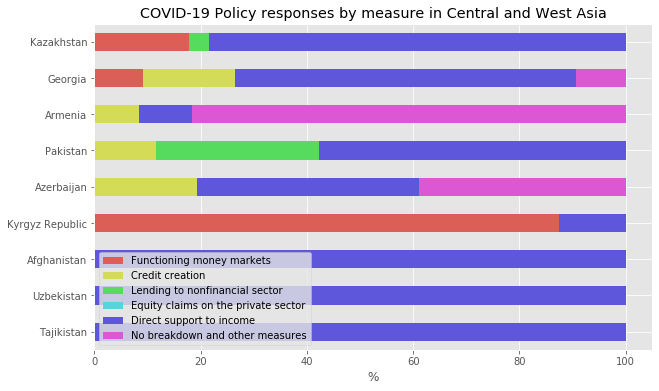

In [37]:
y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
ax = y.iloc[:-1, :].plot(kind='barh', stacked=True, figsize=(10, 6), 
                         colormap=ListedColormap(sns.color_palette("hls")))
ax.set_title('COVID-19 Policy responses by measure in Central and West Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')
ax.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'])

plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


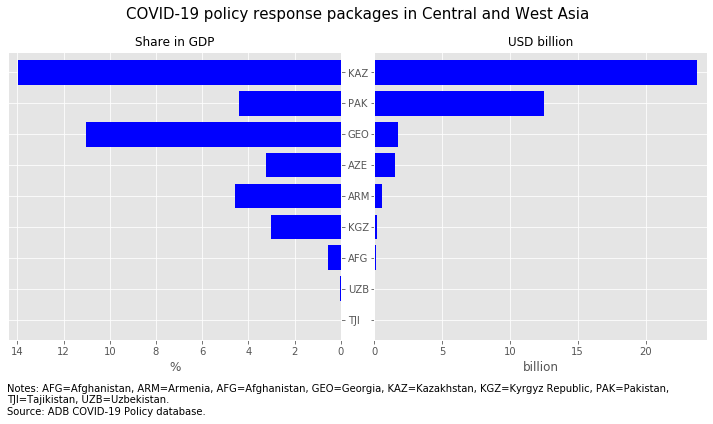

In [38]:
y0 = df2.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.loc['Tajikistan':].index, y0.loc['Tajikistan':], align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.loc['Tajikistan':].index, y1.loc['Tajikistan':], align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('USD billion', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.loc['Tajikistan':].index, yticklabels=['KAZ', 'PAK', 'GEO', 'AZE', 'ARM',
                                         'KGZ', 'AFG', 'UZB', 'TJI'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in Central and West Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: AFG=Afghanistan, ARM=Armenia, AFG=Afghanistan, GEO=Georgia, \
KAZ=Kazakhstan, KGZ=Kyrgyz Republic, PAK=Pakistan, \nTJI=Tajikistan, UZB=Uzbekistan. \nSource: ADB COVID-19 Policy database.', 
            xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

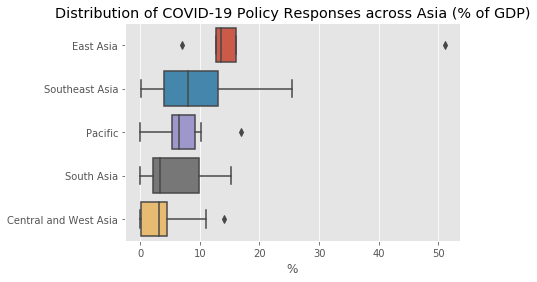

In [39]:
fig, ax = plt.subplots()

sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
            )
# sns.swarmplot(x=df2.reset_index(level=0)['pkg_gdp'], 
#               y=df2.reset_index(level=0)['region'],
#               order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
#               color=".25")

ax.set(title='Distribution of COVID-19 Policy Responses across Asia (% of GDP)',
       ylabel='', xlabel='%')

plt.show()

In [40]:
regional_sum = df3.groupby(level=0).sum()
regional_sum = regional_sum.assign(m1_usd_region = lambda x: 100 * x.m1 / x.amount_usd)
regional_sum = regional_sum.assign(m2_usd_region = lambda x: 100 * x.m2 / x.amount_usd)
regional_sum = regional_sum.assign(m3_usd_region = lambda x: 100 * x.m3 / x.amount_usd)
regional_sum = regional_sum.assign(m4_usd_region = lambda x: 100 * x.m4 / x.amount_usd)
regional_sum = regional_sum.assign(m5_usd_region = lambda x: 100 * x.m5 / x.amount_usd)
regional_sum = regional_sum.assign(m9_usd_region = lambda x: 100 * x.m9 / x.amount_usd)
regional_sum = regional_sum.assign(m10_usd_region = lambda x: 100 * x.m10 / x.amount_usd)
regional_sum = regional_sum.assign(m9_m10_usd_region = lambda x: 100 * (x.m9 + x.m10) / x.amount_usd)
regional_sum

,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd,m1,m2,m3,...,m_others_gdp,m_others_pkg,m1_usd_region,m2_usd_region,m3_usd_region,m4_usd_region,m5_usd_region,m9_usd_region,m10_usd_region,m9_m10_usd_region
region,,,,,,,,,,,,,,,,,,,,,
Central and West Asia,1.253293e+13,4.061675e+10,6.363661e+14,6.733910e+11,3.385120e+08,40.810606,2235.683744,4.621997e+09,2.115231e+09,4.721461e+09,...,6.016851,129.926141,11.379536,5.207780,11.624420,0.000000,68.689338,0.012310,3.086616,3.098926
East Asia,2.743313e+14,2.364410e+12,2.067429e+15,1.674246e+13,1.478575e+09,100.424500,33396.176320,5.817536e+11,2.367690e+11,1.560287e+11,...,11.229038,94.902384,24.604597,10.013870,6.599055,1.682405,53.476057,0.422854,3.201162,3.624016
Other ADB Members,3.820431e+14,1.632813e+13,6.132379e+14,4.818727e+13,1.015085e+09,538.485288,279311.293198,2.265820e+12,5.674782e+12,7.750977e+11,...,29.090773,138.551188,13.876791,34.754639,4.747009,1.644752,35.719515,5.968968,3.288327,9.257294
Other Economies,3.300433e+15,8.591522e+11,2.330315e+16,7.549986e+12,9.922108e+08,81.494673,7311.220042,1.571768e+11,4.009404e+11,5.624179e+10,...,5.380089,137.709605,18.294408,46.666978,6.546196,0.148131,24.620885,0.000000,3.723402,3.723402
Others,5.046988e+12,5.582951e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.106195e+10,4.995796e+12,2.820796e+11,...,0.000000,4.455005,0.198138,89.483074,5.052518,0.010878,4.283723,0.971669,0.000000,0.971669
Pacific,1.334711e+10,2.479064e+09,2.162848e+11,3.469767e+10,1.108472e+07,93.791298,6389.260680,0.000000e+00,2.722817e+07,2.342255e+08,...,5.586966,80.178571,0.000000,1.098325,9.448142,0.000000,36.296469,0.000000,53.157064,53.157064
South Asia,2.746125e+13,3.653912e+11,2.556299e+14,3.378042e+12,1.565001e+09,35.684799,1298.881787,1.500588e+11,6.179337e+10,5.885815e+08,...,0.005110,0.042732,41.067981,16.911562,0.161083,0.000000,41.818323,0.041052,0.000000,0.041052
Southeast Asia,1.561823e+15,3.593955e+11,2.257556e+16,3.114703e+12,6.551682e+08,101.854370,21612.454164,2.611386e+10,5.034596e+10,7.444651e+10,...,17.691840,172.500260,7.266050,14.008509,20.714366,1.118812,49.433775,3.617185,3.841304,7.458488


In [41]:
mask = regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]].index.isin(['Other Economies', 'Other ADB Members', 'Others'])

In [42]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]][~mask]

,m1_usd_region,m2_usd_region,m3_usd_region,m4_usd_region,m5_usd_region,m9_m10_usd_region
region,,,,,,
Central and West Asia,11.379536,5.207780,11.624420,0.000000,68.689338,3.098926
East Asia,24.604597,10.013870,6.599055,1.682405,53.476057,3.624016
Pacific,0.000000,1.098325,9.448142,0.000000,36.296469,53.157064
South Asia,41.067981,16.911562,0.161083,0.000000,41.818323,0.041052
Southeast Asia,7.266050,14.008509,20.714366,1.118812,49.433775,7.458488


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


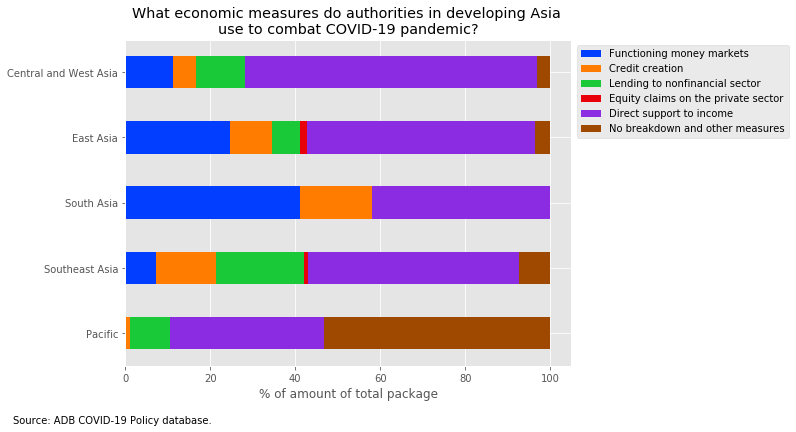

In [43]:
ax = regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]][~mask].iloc[[0, 1, 3, 4, 2], :].\
plot(kind='barh', stacked=True, figsize=(8, 6), 
     colormap=ListedColormap(sns.color_palette('bright', 6)))
ax.invert_yaxis()
ax.set(title='What economic measures do authorities in developing Asia \nuse to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of amount of total package')


ax.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(1.25, 1))
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.25, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')

# plt.tight_layout()
plt.show()

In [53]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)

,amount_lcy,amount_usd,gdp_lcy,gdp_usd,popn,pkg_gdp,pkg_pc_usd,m1,m2,m3,...,m10_pkg,m1_gdp,m2_gdp,m3_gdp,m4_gdp,m5_gdp,m9_gdp,m10_gdp,m_others_gdp,m_others_pkg
country,,,,,,,,,,,,,,,,,,,,,
Kazakhstan,9.810000e+12,2.379624e+10,6.543920e+13,1.703260e+11,18276499.0,13.970997,1302.013047,4.244997e+09,0.000000e+00,8.732565e+08,...,0.000000,2.492278,0.000000,0.512697,0.0,10.966022,0.0000,0.000000,0.000000,0.000000
Pakistan,2.081492e+12,1.254419e+10,3.855880e+13,2.842140e+11,212215030.0,4.413644,59.110771,0.000000e+00,1.464142e+09,3.848205e+09,...,0.000000,0.000000,0.515155,1.353981,0.0,2.544508,0.0000,0.000000,0.000000,0.000000
Georgia,5.334017e+09,1.754188e+09,4.474900e+10,1.592500e+10,3731000.0,11.015312,470.165738,1.600000e+08,3.058474e+08,0.000000e+00,...,9.373798,1.004710,1.920549,0.000000,0.0,7.057500,0.0000,1.032553,1.032553,9.373798
Azerbaijan,2.593500e+09,1.525588e+09,8.019100e+10,4.717100e+10,9942334.0,3.234166,153.443672,0.000000e+00,2.941176e+08,0.000000e+00,...,38.557933,0.000000,0.623514,0.000000,0.0,1.353025,0.0106,1.247027,1.257627,38.885676
Armenia,3.000000e+11,6.134861e+08,6.541000e+12,1.344400e+10,2951776.0,4.563271,207.836264,0.000000e+00,5.112384e+07,0.000000e+00,...,81.666667,0.000000,0.380273,0.000000,0.0,0.456327,0.0000,3.726671,3.726671,81.666667
Kyrgyz Republic,1.850220e+10,2.480000e+08,5.856010e+11,8.261000e+09,6315800.0,3.002058,39.266601,2.170000e+08,0.000000e+00,0.000000e+00,...,0.000000,2.626801,0.000000,0.000000,0.0,0.375257,0.0000,0.000000,0.000000,0.000000
Afghanistan,8.000000e+09,1.016625e+08,1.502470e+12,1.873400e+10,37172386.0,0.542663,2.734893,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.542663,0.0000,0.000000,0.000000,0.000000
Uzbekistan,3.070000e+11,3.213240e+07,5.233730e+14,6.049000e+10,32955400.0,0.053120,0.975027,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.053120,0.0000,0.000000,0.000000,0.000000
Tajikistan,1.240000e+07,1.253464e+06,7.770500e+10,8.152000e+09,9100837.0,0.015376,0.137731,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.015376,0.0000,0.000000,0.000000,0.000000


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:89: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


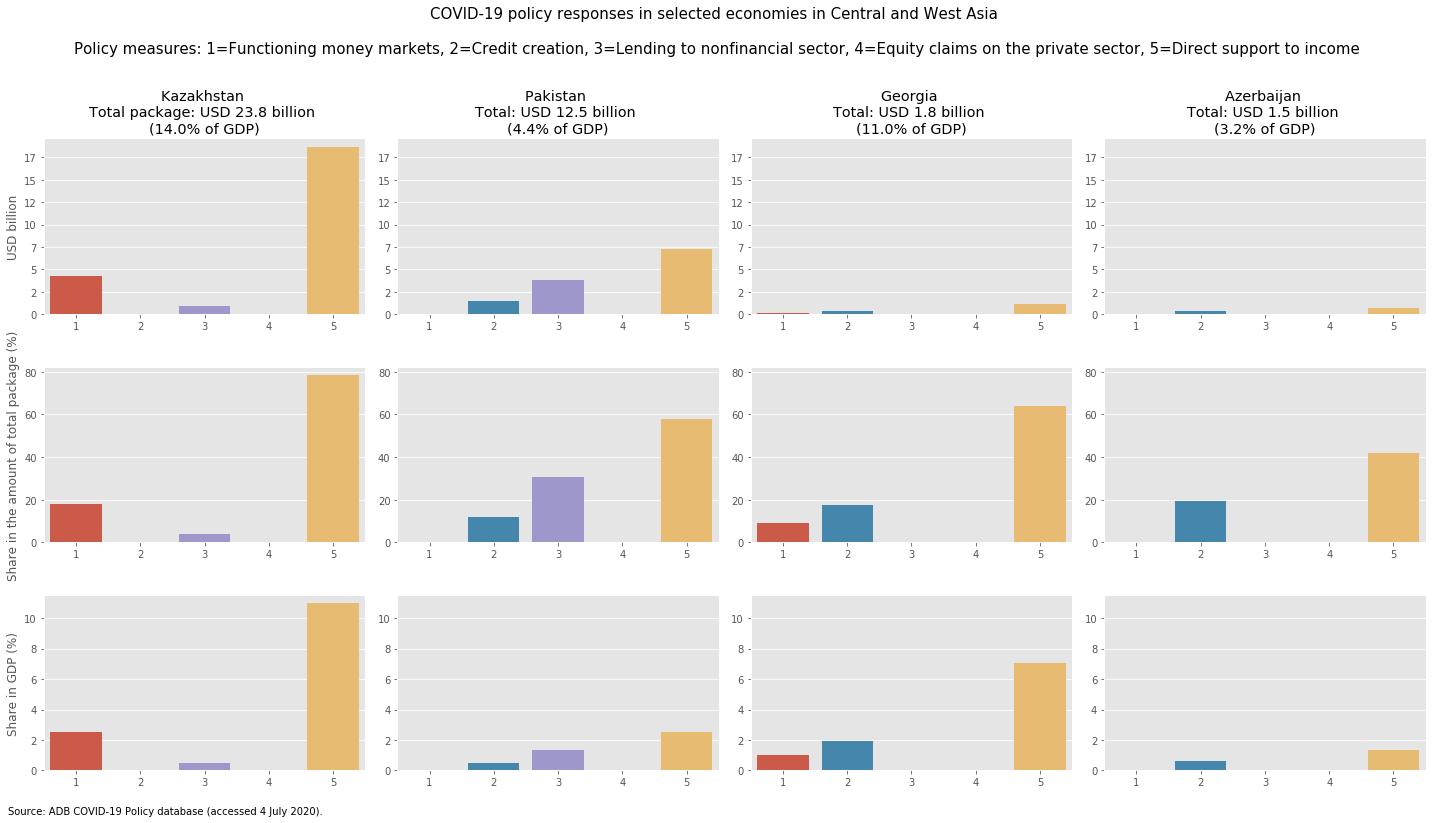

In [75]:
fig = plt.figure(figsize=(20, 10))

kaz_1 = df3.reset_index(level=0).loc['Kazakhstan'].iloc[8:13]
kaz_2 = df3.reset_index(level=0).loc['Kazakhstan'].iloc[15:20]
kaz_3 = df3.reset_index(level=0).loc['Kazakhstan'].iloc[22:27]

pak_1 = df3.reset_index(level=0).loc['Pakistan'].iloc[8:13]
pak_2 = df3.reset_index(level=0).loc['Pakistan'].iloc[15:20]
pak_3 = df3.reset_index(level=0).loc['Pakistan'].iloc[22:27]

geo_1 = df3.reset_index(level=0).loc['Georgia'].iloc[8:13]
geo_2 = df3.reset_index(level=0).loc['Georgia'].iloc[15:20]
geo_3 = df3.reset_index(level=0).loc['Georgia'].iloc[22:27]

aze_1 = df3.reset_index(level=0).loc['Azerbaijan'].iloc[8:13]
aze_2 = df3.reset_index(level=0).loc['Azerbaijan'].iloc[15:20]
aze_3 = df3.reset_index(level=0).loc['Azerbaijan'].iloc[22:27]

ax1 = plt.subplot(341)
sns.barplot(x=kaz_1.index, y=kaz_1, ax=ax1)
ax1.set(title='Kazakhstan \nTotal package: USD 23.8 billion \n(14.0% of GDP)', ylabel='USD billion', xticklabels=[1, 2, 3, 4, 5])
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
# ax1.get_xaxis().set_visible(False)
# ax1.annotate('Total package: USD 61.4 billion',
#              xy=(1, 80), xycoords='axes points', textcoords='offset points')

ax2 = plt.subplot(342, sharey=ax1)
sns.barplot(x=pak_1.index, y=pak_1, ax=ax2)
ax2.set(title='Pakistan \nTotal: USD 12.5 billion \n(4.4% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax2.get_xaxis().set_visible(False)

ax3 = plt.subplot(343, sharey=ax1)
sns.barplot(x=geo_1.index, y=geo_1, ax=ax3)
ax3.set(title='Georgia \nTotal: USD 1.8 billion \n(11.0% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax3.get_xaxis().set_visible(False)

ax4 = plt.subplot(344, sharey=ax1)
sns.barplot(x=aze_1.index, y=aze_1, ax=ax4)
ax4.set(title='Azerbaijan \nTotal: USD 1.5 billion \n(3.2% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax4.get_xaxis().set_visible(False)

ax5 = plt.subplot(345)
sns.barplot(x=kaz_2.index, y=kaz_2, ax=ax5)
ax5.set(title='', ylabel='Share in the amount of total package (%)', xticklabels=[1, 2, 3, 4, 5])
# ax5.get_xaxis().set_visible(False)

ax6 = plt.subplot(346, sharey=ax5)
sns.barplot(x=pak_2.index, y=pak_2, ax=ax6)
ax6.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax6.get_xaxis().set_visible(False)

ax7 = plt.subplot(347, sharey=ax5)
sns.barplot(x=geo_2.index, y=geo_2, ax=ax7)
ax7.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax7.get_xaxis().set_visible(False)

ax8 = plt.subplot(348, sharey=ax5)
sns.barplot(x=aze_2.index, y=aze_2, ax=ax8)
ax8.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax8.get_xaxis().set_visible(False)

ax9 = plt.subplot(349)
sns.barplot(x=kaz_3.index, y=kaz_3, ax=ax9)
ax9.set(title='', ylabel='Share in GDP (%)', xticklabels=[1, 2, 3, 4, 5])
# ax9.get_xaxis().set_visible(False)
ax9.yaxis.set_major_locator(MaxNLocator(integer=True))

ax10 = plt.subplot(3, 4, 10, sharey=ax9)
sns.barplot(x=pak_3.index, y=pak_3, ax=ax10)
ax10.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax10.get_xaxis().set_visible(False)

ax11 = plt.subplot(3, 4, 11, sharey=ax9)
sns.barplot(x=geo_3.index, y=geo_3, ax=ax11)
ax11.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax11.get_xaxis().set_visible(False)

az12 = plt.subplot(3, 4, 12, sharey=ax9)
sns.barplot(x=aze_3.index, y=aze_3, ax=az12)
az12.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# az12.get_xaxis().set_visible(False)

fig.suptitle('COVID-19 policy responses in selected economies in Central and West Asia \n\nPolicy measures: 1=Functioning money markets, 2=Credit creation, \
3=Lending to nonfinancial sector, 4=Equity claims on the private sector, 5=Direct support to income',
             y=1.1, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.3)
plt.annotate('Source: ADB COVID-19 Policy database (accessed 4 July 2020).', 
            xy=(-3.4, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [71]:
round(df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm1', 'm2', 'm3', 'm4', 'm5']]/1e9, 1)

,amount_usd,m1,m2,m3,m4,m5
country,,,,,,
Kazakhstan,23.8,4.2,0.0,0.9,0.0,18.7
Pakistan,12.5,0.0,1.5,3.8,0.0,7.2
Georgia,1.8,0.2,0.3,0.0,0.0,1.1
Azerbaijan,1.5,0.0,0.3,0.0,0.0,0.6
Armenia,0.6,0.0,0.1,0.0,0.0,0.1
Kyrgyz Republic,0.2,0.2,0.0,0.0,0.0,0.0
Afghanistan,0.1,0.0,0.0,0.0,0.0,0.1
Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0
Tajikistan,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
round(df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['pkg_gdp']], 2)

,pkg_gdp
country,
Kazakhstan,13.97
Pakistan,4.41
Georgia,11.02
Azerbaijan,3.23
Armenia,4.56
Kyrgyz Republic,3.00
Afghanistan,0.54
Uzbekistan,0.05
Tajikistan,0.02


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:110: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


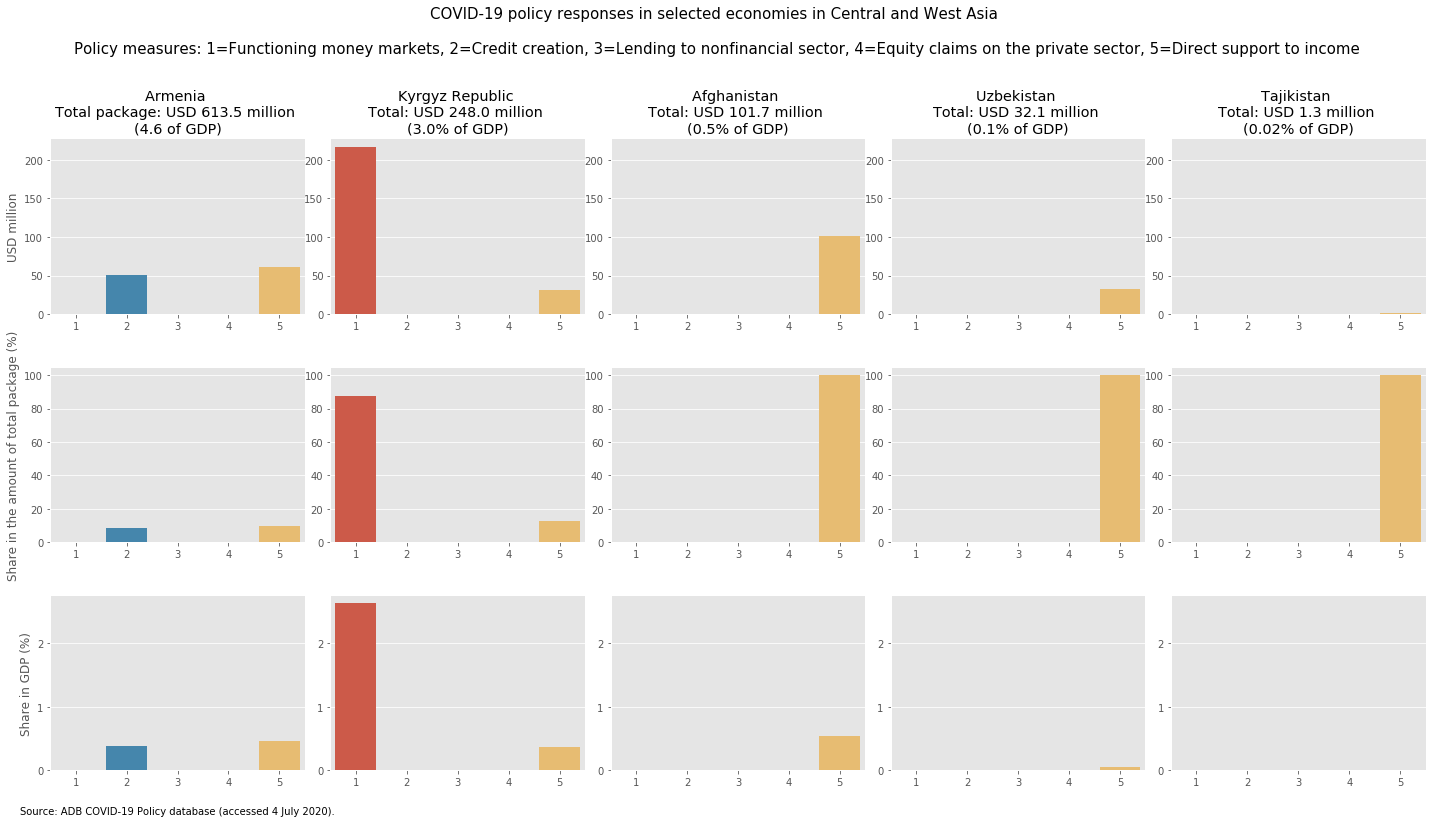

In [88]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(20, 10))

arm_1 = df3.reset_index(level=0).loc['Armenia'].iloc[8:13]
arm_2 = df3.reset_index(level=0).loc['Armenia'].iloc[15:20]
arm_3 = df3.reset_index(level=0).loc['Armenia'].iloc[22:27]

kgz_1 = df3.reset_index(level=0).loc['Kyrgyz Republic'].iloc[8:13]
kgz_2 = df3.reset_index(level=0).loc['Kyrgyz Republic'].iloc[15:20]
kgz_3 = df3.reset_index(level=0).loc['Kyrgyz Republic'].iloc[22:27]

afg_1 = df3.reset_index(level=0).loc['Afghanistan'].iloc[8:13]
afg_2 = df3.reset_index(level=0).loc['Afghanistan'].iloc[15:20]
afg_3 = df3.reset_index(level=0).loc['Afghanistan'].iloc[22:27]

uzb_1 = df3.reset_index(level=0).loc['Uzbekistan'].iloc[8:13]
uzb_2 = df3.reset_index(level=0).loc['Uzbekistan'].iloc[15:20]
uzb_3 = df3.reset_index(level=0).loc['Uzbekistan'].iloc[22:27]

taj_1 = df3.reset_index(level=0).loc['Tajikistan'].iloc[8:13]
taj_2 = df3.reset_index(level=0).loc['Tajikistan'].iloc[15:20]
taj_3 = df3.reset_index(level=0).loc['Tajikistan'].iloc[22:27]

ax1 = plt.subplot(351)
sns.barplot(x=arm_1.index, y=arm_1, ax=ax1)
ax1.set(title='Armenia \nTotal package: USD 613.5 million \n(4.6 of GDP)', ylabel='USD million', xticklabels=[1, 2, 3, 4, 5])
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))
# ax1.get_xaxis().set_visible(False)
# ax1.annotate('Total package: USD 61.4 billion',
#              xy=(1, 80), xycoords='axes points', textcoords='offset points')

ax2 = plt.subplot(352, sharey=ax1)
sns.barplot(x=kgz_1.index, y=kgz_1, ax=ax2)
ax2.set(title='Kyrgyz Republic \nTotal: USD 248.0 million \n(3.0% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax2.get_xaxis().set_visible(False)

ax3 = plt.subplot(353, sharey=ax1)
sns.barplot(x=afg_1.index, y=afg_1, ax=ax3)
ax3.set(title='Afghanistan \nTotal: USD 101.7 million \n(0.5% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax3.get_xaxis().set_visible(False)

ax4 = plt.subplot(354, sharey=ax1)
sns.barplot(x=uzb_1.index, y=uzb_1, ax=ax4)
ax4.set(title='Uzbekistan \nTotal: USD 32.1 million \n(0.1% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax4.get_xaxis().set_visible(False)

ax5 = plt.subplot(355, sharey=ax1)
sns.barplot(x=taj_1.index, y=taj_1, ax=ax5)
ax5.set(title='Tajikistan \nTotal: USD 1.3 million \n(0.02% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax5.get_xaxis().set_visible(False)

ax6 = plt.subplot(356)
sns.barplot(x=arm_2.index, y=arm_2, ax=ax6)
ax6.set(title='', ylabel='Share in the amount of total package (%)', xticklabels=[1, 2, 3, 4, 5])
# ax6.get_xaxis().set_visible(False)

ax7 = plt.subplot(357, sharey=ax6)
sns.barplot(x=kgz_2.index, y=kgz_2, ax=ax7)
ax7.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax7.get_xaxis().set_visible(False)

ax8 = plt.subplot(358, sharey=ax6)
sns.barplot(x=afg_2.index, y=afg_2, ax=ax8)
ax8.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax8.get_xaxis().set_visible(False)

ax9 = plt.subplot(359, sharey=ax6)
sns.barplot(x=uzb_2.index, y=uzb_2, ax=ax9)
ax9.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax9.get_xaxis().set_visible(False)

ax10 = plt.subplot(3, 5, 10, sharey=ax6)
sns.barplot(x=taj_2.index, y=taj_2, ax=ax10)
ax10.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax10.get_xaxis().set_visible(False)

ax11 = plt.subplot(3, 5, 11)
sns.barplot(x=arm_3.index, y=arm_3, ax=ax11)
ax11.set(title='', ylabel='Share in GDP (%)', xticklabels=[1, 2, 3, 4, 5])
# ax11.get_xaxis().set_visible(False)
ax11.yaxis.set_major_locator(MaxNLocator(integer=True))

ax12 = plt.subplot(3, 5, 12, sharey=ax11)
sns.barplot(x=kgz_3.index, y=kgz_3, ax=ax12)
ax12.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax12.get_xaxis().set_visible(False)

ax13 = plt.subplot(3, 5, 13, sharey=ax11)
sns.barplot(x=afg_3.index, y=afg_3, ax=ax13)
ax13.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax13.get_xaxis().set_visible(False)

ax14 = plt.subplot(3, 5, 14, sharey=ax11)
sns.barplot(x=uzb_3.index, y=uzb_3, ax=ax14)
ax14.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax14.get_xaxis().set_visible(False)

ax15 = plt.subplot(3, 5, 15, sharey=ax11)
sns.barplot(x=taj_3.index, y=taj_3, ax=ax15)
ax15.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax15.get_xaxis().set_visible(False)


fig.suptitle('COVID-19 policy responses in selected economies in Central and West Asia \n\nPolicy measures: 1=Functioning money markets, 2=Credit creation, \
3=Lending to nonfinancial sector, 4=Equity claims on the private sector, 5=Direct support to income',
             y=1.1, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.3)
plt.annotate('Source: ADB COVID-19 Policy database (accessed 4 July 2020).', 
            xy=(-4.5, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [84]:
round(df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm1', 'm2', 'm3', 'm4', 'm5']]/1e6, 1)

,amount_usd,m1,m2,m3,m4,m5
country,,,,,,
Kazakhstan,23796.2,4245.0,0.0,873.3,0.0,18678.0
Pakistan,12544.2,0.0,1464.1,3848.2,0.0,7231.8
Georgia,1754.2,160.0,305.8,0.0,0.0,1123.9
Azerbaijan,1525.6,0.0,294.1,0.0,0.0,638.2
Armenia,613.5,0.0,51.1,0.0,0.0,61.3
Kyrgyz Republic,248.0,217.0,0.0,0.0,0.0,31.0
Afghanistan,101.7,0.0,0.0,0.0,0.0,101.7
Uzbekistan,32.1,0.0,0.0,0.0,0.0,32.1
Tajikistan,1.3,0.0,0.0,0.0,0.0,1.3
